In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# result_path = "./rq4_non_breaking_results.csv"
result_path = "./prs_table_after_updating_link_errors.csv"
original_df = pd.read_csv(result_path)
original_df

,repository,number,eligible,ga,v_old,v_new,update_type,statically_compatible,dynamically_compatible,err
0,ApliNi/Chat2QQ,29,1,io.github.dreamvoid:MiraiMC-Integration,1.8-rc1,1.8-pre2,minor,1,0.0,no_test
1,ApliNi/Chat2QQ,31,1,io.github.dreamvoid:MiraiMC-Integration,1.8-rc2,1.8-pre2,minor,1,0.0,no_test
2,ApliNi/Chat2QQ,36,1,me.clip:placeholderapi,2.11.3,2.11.4,patch,0,NaN,no_jar
3,ApliNi/Chat2QQ,37,1,me.clip:placeholderapi,2.11.4,2.11.5,patch,0,NaN,no_jar
4,ApliNi/Chat2QQ,38,1,org.jetbrains:annotations,24.0.1,24.1.0,minor,1,0.0,no_maven
...,...,...,...,...,...,...,...,...,...,...
1743,whereareiam/Socialismus,19,1,org.apache.maven.plugins:maven-shade-plugin,3.5.1,3.5.2,patch,1,NaN,NO_GITHUB
1744,whereareiam/Socialismus,20,1,net.kyori:adventure-text-minimessage,4.15.0,4.16.0,minor,1,0.0,no_maven
1745,whereareiam/Socialismus,21,1,org.xerial:sqlite-jdbc,3.45.1.0,3.45.2.0,patch,1,1.0,NaN
1746,whereareiam/Socialismus,23,1,org.apache.maven.plugins:maven-compiler-plugin,3.12.1,3.13.0,minor,1,1.0,NaN


In [14]:
df = original_df.drop_duplicates(subset=['ga', 'v_old', 'v_new'])
df # df with only unique combinations of ga, v_old, v_new


,repository,number,eligible,ga,v_old,v_new,update_type,statically_compatible,dynamically_compatible,err
0,ApliNi/Chat2QQ,29,1,io.github.dreamvoid:MiraiMC-Integration,1.8-rc1,1.8-pre2,minor,1,0.0,no_test
1,ApliNi/Chat2QQ,31,1,io.github.dreamvoid:MiraiMC-Integration,1.8-rc2,1.8-pre2,minor,1,0.0,no_test
2,ApliNi/Chat2QQ,36,1,me.clip:placeholderapi,2.11.3,2.11.4,patch,0,NaN,no_jar
3,ApliNi/Chat2QQ,37,1,me.clip:placeholderapi,2.11.4,2.11.5,patch,0,NaN,no_jar
4,ApliNi/Chat2QQ,38,1,org.jetbrains:annotations,24.0.1,24.1.0,minor,1,0.0,no_maven
...,...,...,...,...,...,...,...,...,...,...
1736,whereareiam/Socialismus,9,1,net.kyori:adventure-platform-bukkit,4.3.0,4.3.2,patch,1,0.0,no_maven
1739,whereareiam/Socialismus,12,1,net.kyori:adventure-text-serializer-plain,4.14.0,4.15.0,minor,1,0.0,no_maven
1740,whereareiam/Socialismus,13,1,org.apache.maven.plugins:maven-javadoc-plugin,3.3.0,3.6.3,minor,0,NaN,NaN
1741,whereareiam/Socialismus,14,1,org.xerial:sqlite-jdbc,3.44.1.0,3.45.0.0,minor,1,0.0,NaN


In [15]:
unique_gas = df.groupby(['ga']).size()
unique_gas

ga
Impala:ImpalaJDBC42                                  1
au.com.acegi:xml-format-maven-plugin                 1
ch.qos.logback:logback-classic                      15
ch.qos.logback:logback-core                          1
cn.hutool:hutool-all                                 6
                                                    ..
org.yaml:snakeyaml                                   5
rocks.palaiologos:maja                               2
se.bjurr.gitchangelog:git-changelog-maven-plugin     2
software.amazon.awssdk:bom                          13
tech.jhipster.lite:jhlite                            2
Length: 348, dtype: int64

In [16]:
unique_base_gavs = df.groupby(['ga', 'v_old']).size()
unique_base_gavs

ga                                    v_old      
Impala:ImpalaJDBC42                   2.6.29.1035    1
au.com.acegi:xml-format-maven-plugin  3.2.2          1
ch.qos.logback:logback-classic        1.2.10         1
                                      1.2.11         1
                                      1.3.6          1
                                                    ..
software.amazon.awssdk:bom            2.20.97        1
                                      2.22.9         2
                                      2.23.16        1
tech.jhipster.lite:jhlite             0.48.0         1
                                      1.0.0          1
Length: 1015, dtype: int64

In [17]:
unique_updates = df.groupby(['ga', 'v_old', 'v_new']).size()
unique_updates

ga                                    v_old        v_new      
Impala:ImpalaJDBC42                   2.6.29.1035  2.6.32.1041    1
au.com.acegi:xml-format-maven-plugin  3.2.2        3.3.1          1
ch.qos.logback:logback-classic        1.2.10       1.3.12         1
                                      1.2.11       1.2.13         1
                                      1.3.6        1.3.12         1
                                                                 ..
software.amazon.awssdk:bom            2.22.9       2.23.15        1
                                                   2.23.16        1
                                      2.23.16      2.25.0         1
tech.jhipster.lite:jhlite             0.48.0       1.0.0          1
                                      1.0.0        1.1.0          1
Length: 1087, dtype: int64

In [18]:
err_counts = df['err'].value_counts()
print(f"Overall distribution of errs: ")
print(err_counts)

# Error count when statically_compatible = 0
static_err_counts = df[df['statically_compatible'] == 0]['err'].value_counts()

# Error count when statically_compatible = 1
static_pass_err_counts = df[df['statically_compatible'] == 1]['err'].value_counts()

# Error count when dynamically_compatible = 0
dynamic_err_counts = df[df['dynamically_compatible'] == 0]['err'].value_counts()

# Error count when dynamically_compatible = 1
dynamic_pass_err_counts = df[df['dynamically_compatible'] == 1]['err'].value_counts()

print("\nDistribution of errors when statically_compatible = 0:")
print(static_err_counts)
print("\nDistribution of errors when statically_compatible = 1:")
print(static_pass_err_counts)

print("\nDistribution of errors when dynamically_compatible = 0:")
print(dynamic_err_counts)
print("\nDistribution of errors when dynamically_compatible = 1:")
print(dynamic_pass_err_counts)

Overall distribution of errs: 
err
NO_GITHUB     168
no_maven      139
no_jar         84
no_test        81
no_compile     72
NO_JAR         37
NO_TAG         34
no_resolve      4
Name: count, dtype: int64

Distribution of errors when statically_compatible = 0:
err
no_jar    84
NO_JAR    37
Name: count, dtype: int64

Distribution of errors when statically_compatible = 1:
err
NO_GITHUB     168
no_maven      139
no_test        81
no_compile     72
NO_TAG         34
no_resolve      4
Name: count, dtype: int64

Distribution of errors when dynamically_compatible = 0:
err
no_maven      139
no_test        81
no_compile     72
no_resolve      4
Name: count, dtype: int64

Distribution of errors when dynamically_compatible = 1:
Series([], Name: count, dtype: int64)


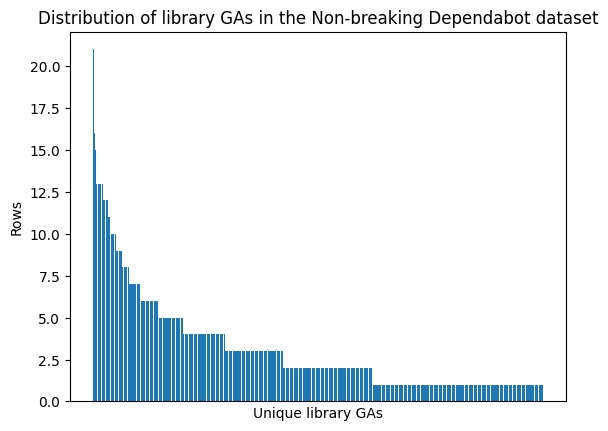

In [197]:
# Count occurrences of each unique value in 'GA' column
value_counts = df['ga'].value_counts()

# Plot distribution
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Unique library GAs')
plt.ylabel('Rows')
plt.title('Distribution of library GAs in the Non-breaking Dependabot dataset')
plt.xticks([])  # Empty list to remove x-axis ticks
plt.show()

In [198]:
# Count rows where statically_compatible is not NULL and err is NULL
static_null_err_count = df[(~df['statically_compatible'].isnull()) & (df['err'].isnull())].shape[0]

# Count rows where dynamically_compatible is not NULL and err is NULL
dynamic_null_err_count = df[(~df['dynamically_compatible'].isnull()) & (df['err'].isnull())].shape[0]


print("Number of rows where statically_compatible is not NULL and err is NULL:", static_null_err_count)
print("Number of rows where dynamically_compatible is not NULL and err is NULL:", dynamic_null_err_count)

Number of rows where statically_compatible is not NULL and err is NULL: 468
Number of rows where dynamically_compatible is not NULL and err is NULL: 78


In [201]:
no_err_df = df[df['err'].isnull()]
err_null_count = no_err_df.shape[0]
print("Collected points:", df.shape[0])
print("Successfully evaluated points:", err_null_count)  # Why isn't this 466?

statically_compatible = no_err_df[(no_err_df['statically_compatible'] == 1)]
statically_incompatible = no_err_df[(no_err_df['statically_compatible'] == 0)]
dynamically_compatible = no_err_df[(no_err_df['dynamically_compatible'] == 1)]
dynamically_incompatible = no_err_df[(no_err_df['dynamically_compatible'] == 0)]
print(f"\nStatically compatible: {statically_compatible.shape[0]}")
print(f"Statically incompatible: {statically_incompatible.shape[0]}")
print(f"Dynamically compatible: {dynamically_compatible.shape[0]}")
print(f"Dynamically incompatible: {dynamically_incompatible.shape[0]}")
shouldnt = no_err_df[(no_err_df['statically_compatible'] == 1) & (no_err_df['dynamically_compatible'].isnull())]
print(f"shouldnt happen: {shouldnt.shape[0]}")

evaluated = statically_incompatible.shape[0] + dynamically_compatible.shape[0] + dynamically_incompatible.shape[0]
print(f"\nSuccessfully evaluated points: {evaluated}")
incorrect_evaluations = no_err_df[(no_err_df['statically_compatible'] == 0) | (no_err_df['dynamically_compatible'] == 0)].shape[0]
print("Incorrectly evaluated points:", incorrect_evaluations)
correct_evaluations = dynamically_compatible.shape[0]
print("Correctly evaluated points:", correct_evaluations)
print(shouldnt)

Collected points: 1087
Successfully evaluated points: 468

Statically compatible: 78
Statically incompatible: 390
Dynamically compatible: 67
Dynamically incompatible: 11
shouldnt happen: 0

Successfully evaluated points: 468
Incorrectly evaluated points: 401
Correctly evaluated points: 67
Empty DataFrame
Columns: [repository, number, eligible, ga, v_old, v_new, update_type, statically_compatible, dynamically_compatible, err]
Index: []


In [202]:
success_rate = err_null_count / df.shape[0]
recall = correct_evaluations / df.shape[0]
precision = correct_evaluations / err_null_count  # Wrong. I think precision in this case is just 1.0

print(f"Success rate={success_rate * 100}%")
print(f"Recall={recall}")
print(f"Precision={precision}")  # I dont know if precision makes sense here since there is only one class

Success rate=43.054277828886846%
Recall=0.061637534498620056
Precision=0.14316239316239315


In [231]:
def print_update_type_distribution(dfr):
    distribution = dfr['update_type'].value_counts()
    output_string = ", ".join([f"{index}={value}" for index, value in distribution.items()])
    print(f"    update type distribution: {output_string}")

def print_err_distribution(dfr):
    distribution = dfr['err'].value_counts()
    output_string = ", ".join([f"{index}={value}" for index, value in distribution.items()])
    print(f"    err distribution: {output_string}")

# Count rows where statically_compatible = 1 and 0
static_compatibles = df[df['statically_compatible'] == 1]
static_incompatibles = df[(df['statically_compatible'] == 0) & (~df['err'].isin(['no_jar', 'NO_JAR']))]
print("Number evaluations = statically_compatible:", static_compatibles.shape[0])
print_update_type_distribution(static_compatibles)
print("Number evaluations = statically_incompatible:", static_incompatibles.shape[0])
print_update_type_distribution(static_incompatibles)

successful_links = static_compatibles[(~static_compatibles['err'].isin(['NO_GITHUB', 'NO_TAG']))]
successful_runs = successful_links[(~successful_links['err'].isin(['no_test', 'no_maven', 'no_resolve', 'no_compile']))]
print("\nNumber linkable:", successful_links.shape[0])
print_update_type_distribution(successful_links)
print("Number runnable:", successful_runs.shape[0])
print_update_type_distribution(successful_runs)

dynamic_compatibles = df[df['dynamically_compatible'] == 1]
dynamic_incompatibles = df[(df['dynamically_compatible'] == 0) & (df['err'].isnull())]
print("\nNumber evaluations = dynamically_compatible:", dynamic_compatibles.shape[0])
print_update_type_distribution(dynamic_compatibles)
print("Number evaluations = dynamically_incompatible:", dynamic_incompatibles.shape[0])
print_update_type_distribution(dynamic_incompatibles)

link_failures = df[(df['err'].isin(['NO_GITHUB', 'NO_TAG']))]
run_failures = df[(df['err'].isin(['no_test', 'no_maven', 'no_resolve', 'no_compile']))]
print("\nNumber linking failures:", link_failures.shape[0])
print_err_distribution(link_failures)
print("Number run failures:", run_failures.shape[0])
print_err_distribution(run_failures)

Number evaluations = statically_compatible: 576
    update type distribution: patch=384, minor=140, major=50, other=2
Number evaluations = statically_incompatible: 390
    update type distribution: minor=213, patch=135, major=42

Number linkable: 374
    update type distribution: patch=270, minor=94, major=8, other=2
Number runnable: 78
    update type distribution: patch=53, minor=21, major=4

Number evaluations = dynamically_compatible: 67
    update type distribution: patch=48, minor=16, major=3
Number evaluations = dynamically_incompatible: 11
    update type distribution: patch=5, minor=5, major=1

Number linking failures: 202
    err distribution: NO_GITHUB=168, NO_TAG=34
Number run failures: 296
    err distribution: no_maven=139, no_test=81, no_compile=72, no_resolve=4


In [187]:
# Print the distribution of 'update_type'
update_type_distribution = df['update_type'].value_counts()
print("Distribution of 'update_type':")
print(update_type_distribution)

# Filter the DataFrame to include only rows where 'statically_compatible' equals 1
static_compatible_df = df[df['statically_compatible'] == 1]

# Print the distribution of 'update_type' for rows where 'statically_compatible' = 1
update_type_distribution = static_compatible_df['update_type'].value_counts()
print("\nDistribution of 'update_type' for rows where 'statically_compatible' = 1:")
print(update_type_distribution)

# Filter the DataFrame based on the conditions
filtered_df = df[(df['statically_compatible'] == 0) & (~df['err'].isin(['NO_JAR', 'no_jar']))]

# Print the distribution of 'update_type'
update_type_distribution = filtered_df['update_type'].value_counts()
print("\nUpdate type distribution where statically_compatible = 0 and err is not 'NO_JAR' or 'no_jar':")
print(update_type_distribution)

# Filter the DataFrame based on the conditions
filtered_df = df[(df['statically_compatible'] == 1) & (~df['err'].isin(['NO_GITHUB', 'NO_TAG']))]

# Print the distribution of 'update_type'
update_type_distribution = filtered_df['update_type'].value_counts()
print("\n[Successfully linked] Update type distribution where statically_compatible = 1 and err not 'NO_GITHUB' nor 'NO_TAG':")
print(update_type_distribution)

filtered_df = df[(df['dynamically_compatible'] == 1) & pd.isnull(df['err'])]

# Print the distribution of 'update_type'
update_type_distribution = filtered_df['update_type'].value_counts()
print("\n[Dynamically compatible] Update type distribution where dynamically_compatible = 1 and err is None:")
print(update_type_distribution)

filtered_df = df[(df['dynamically_compatible'] == 0) & pd.isnull(df['err'])]

# Print the distribution of 'update_type'
update_type_distribution = filtered_df['update_type'].value_counts()
print("\n[Dynamically incompatible] Update type distribution where dynamically_compatible = 0 and err is None:")
print(update_type_distribution)

filtered_df = df[(df['dynamically_compatible'] == 1)]

# Print the distribution of 'update_type'
update_type_distribution = filtered_df['update_type'].value_counts()
print("\n[Dynamically compatible] Update type distribution where dynamically_compatible = 1")
print(update_type_distribution)

Distribution of 'update_type':
update_type
patch    607
minor    380
major     97
other      3
Name: count, dtype: int64

Distribution of 'update_type' for rows where 'statically_compatible' = 1:
update_type
patch    384
minor    140
major     50
other      2
Name: count, dtype: int64

Update type distribution where statically_compatible = 0 and err is not 'NO_JAR' or 'no_jar':
update_type
minor    213
patch    135
major     42
Name: count, dtype: int64

[Successfully linked] Update type distribution where statically_compatible = 1 and err not 'NO_GITHUB' nor 'NO_TAG':
update_type
patch    278
minor     96
major      8
other      2
Name: count, dtype: int64

[Dynamically compatible] Update type distribution where dynamically_compatible = 1 and err is None:
update_type
patch    48
minor    15
major     3
Name: count, dtype: int64

[Dynamically incompatible] Update type distribution where dynamically_compatible = 0 and err is None:
update_type
minor    5
patch    4
major    1
Name: count

In [188]:
# Filter the DataFrame based on the conditions
filtered_df = df[(df['err'] != 'NO_GITHUB') & (df['err'] != 'NO_TAG') & (df['statically_compatible'] == 1)]

# Count the number of rows
num_rows = filtered_df.shape[0]

print("Number of rows where err is not 'NO_GITHUB' or 'NO_TAG' and statically_compatible = 1:", num_rows)

# Filter the DataFrame based on the conditions
filtered_df = df[(df['err'] == 'no_test') | (df['err'] == 'no_maven') | (df['err'] == 'no_compile') | (df['err'] == 'no_resolve')]

# Count the number of rows
num_rows = filtered_df.shape[0]

print("Number of rows where err is 'NO_GITHUB' or 'NO_TAG':", num_rows)

Number of rows where err is not 'NO_GITHUB' or 'NO_TAG' and statically_compatible = 1: 384
Number of rows where err is 'NO_GITHUB' or 'NO_TAG': 298
